In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/goldstock.csv')


#EDA

In [78]:
# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1


In [79]:
# Display the last few rows of the dataset
print(data.tail())

      Unnamed: 0        Date   Close   Volume    Open    High     Low
2506        2528  2014-01-28  1250.5  81426.0  1254.9  1261.9  1248.0
2507        2529  2014-01-27  1263.5  63419.0  1269.9  1280.1  1252.0
2508        2530  2014-01-24  1264.5  34998.0  1264.3  1273.2  1256.9
2509        2531  2014-01-23  1262.5  41697.0  1235.1  1267.1  1230.8
2510        2532  2014-01-22  1238.6  80262.0  1240.5  1243.5  1235.5


In [3]:
# Get basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB
None


In [8]:
print(data.shape)

(2511, 7)


In [5]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [4]:
# Get descriptive statistics
print(data.describe())

        Unnamed: 0        Close         Volume         Open         High  \
count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
std     729.262879   298.824811   97600.769382   299.118187   301.262244   
min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
25%     630.500000  1249.850000  126693.500000  1249.500000  1257.300000   
50%    1259.000000  1332.800000  175421.000000  1334.000000  1342.400000   
75%    1888.500000  1805.850000  234832.000000  1805.600000  1815.450000   
max    2532.000000  2093.100000  787217.000000  2094.400000  2098.200000   

               Low  
count  2511.000000  
mean   1488.869932  
std     296.417703  
min    1045.400000  
25%    1242.350000  
50%    1326.600000  
75%    1793.050000  
max    2074.600000  


In [11]:
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')


In [13]:
data[data.duplicated()] # no duplicates found

,Unnamed: 0,Date,Close,Volume,Open,High,Low


In [80]:
# Check for missing values
data.isnull().sum()               # no null values found

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

#Visualizing the data

<Axes: >

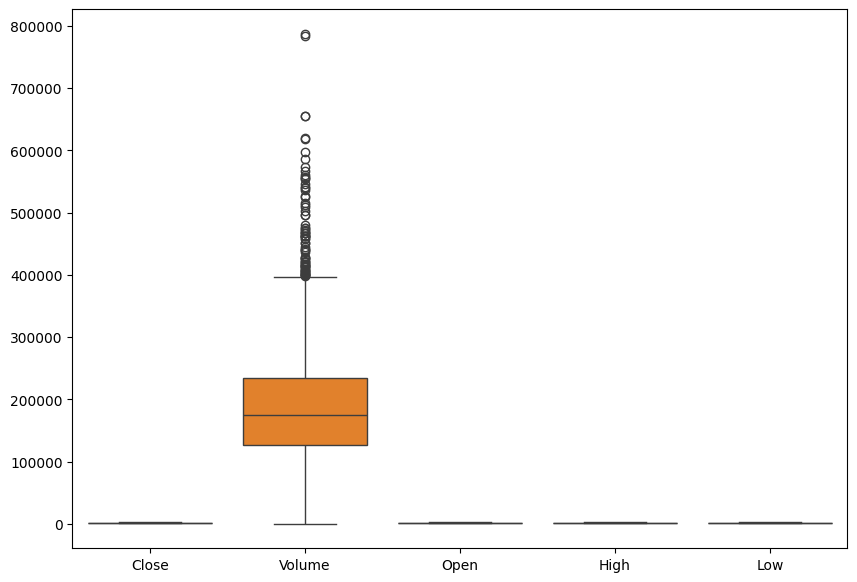

In [66]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data[['Close','Volume','Open','High','Low']])        # outliers found for volume

In [67]:
def detect_outliers_iqr(data):
    outlier_list =[]
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list

In [69]:
import numpy as np
for i in ['Close','Volume','Open','High','Low']:
    outliers = detect_outliers_iqr(data[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Close attribute : []
Outliers in Volume attribute : [398268.0, 399552.0, 400130.0, 400358.0, 401849.0, 402011.0, 402704.0, 404779.0, 405262.0, 406886.0, 407079.0, 407500.0, 409954.0, 412083.0, 412332.0, 413624.0, 414022.0, 416513.0, 417251.0, 418145.0, 420069.0, 421344.0, 422485.0, 424759.0, 426262.0, 426438.0, 428618.0, 436289.0, 439428.0, 440405.0, 440804.0, 444146.0, 450394.0, 451237.0, 457363.0, 459203.0, 461831.0, 461990.0, 462693.0, 462742.0, 467110.0, 467541.0, 467773.0, 471109.0, 472155.0, 474508.0, 475721.0, 480662.0, 495364.0, 496645.0, 503085.0, 509138.0, 511767.0, 515771.0, 524471.0, 527205.0, 535860.0, 539023.0, 541575.0, 546280.0, 553457.0, 555564.0, 556617.0, 560547.0, 567523.0, 573018.0, 586738.0, 598082.0, 618309.0, 619051.0, 654660.0, 655245.0, 783657.0, 787217.0]
Outliers in Open attribute : []
Outliers in High attribute : []
Outliers in Low attribute : []


In [70]:
def handle_outliers(data):
    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)
    b = np.where(data<tenth_percentile, tenth_percentile, data)
    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
for i in ['Volume']:
    data[i]=handle_outliers(data[i])

<Axes: >

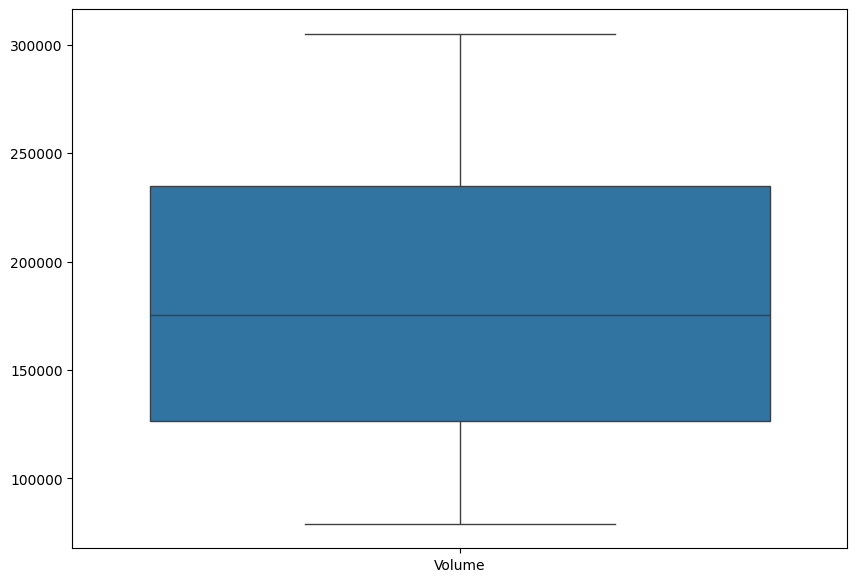

In [72]:
# verifying again with boxplot
plt.figure(figsize=(10,7))
sns.boxplot(data=data[['Volume']])

<Axes: >

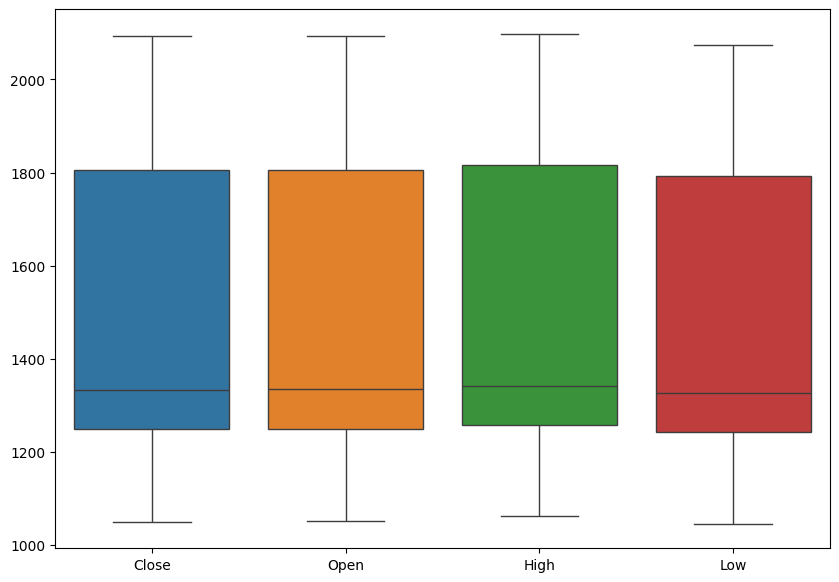

In [73]:
# verifying again with boxplot
plt.figure(figsize=(10,7))
sns.boxplot(data=data[['Close','Open','High','Low']])

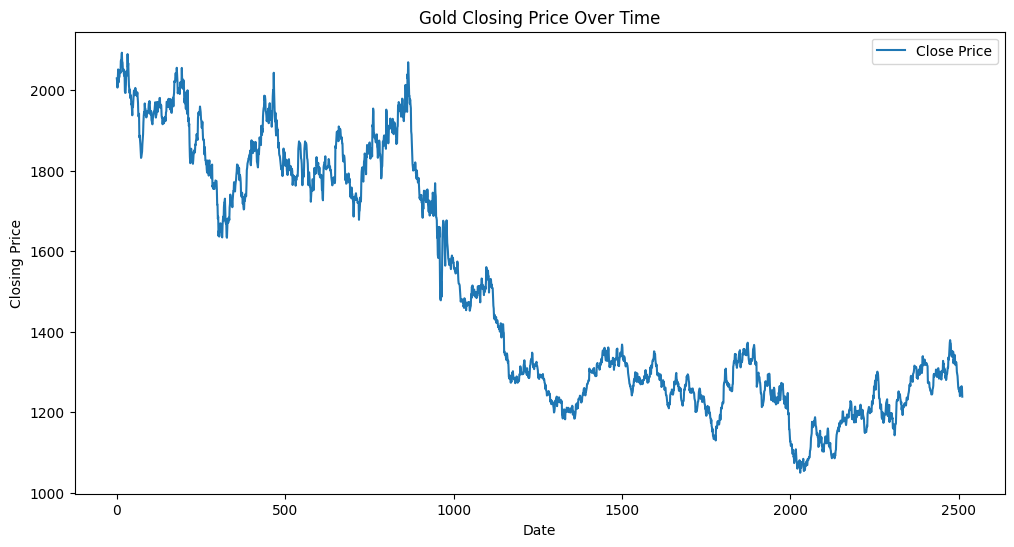

In [20]:
# Plot the closing price of gold over time
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Gold Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

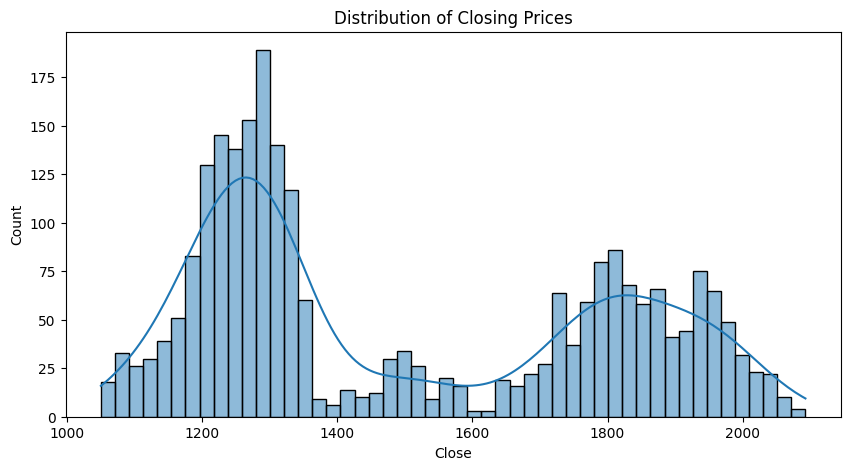

In [21]:
# Plot the distribution of the closing prices
plt.figure(figsize=(10, 5))
sns.histplot(data['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

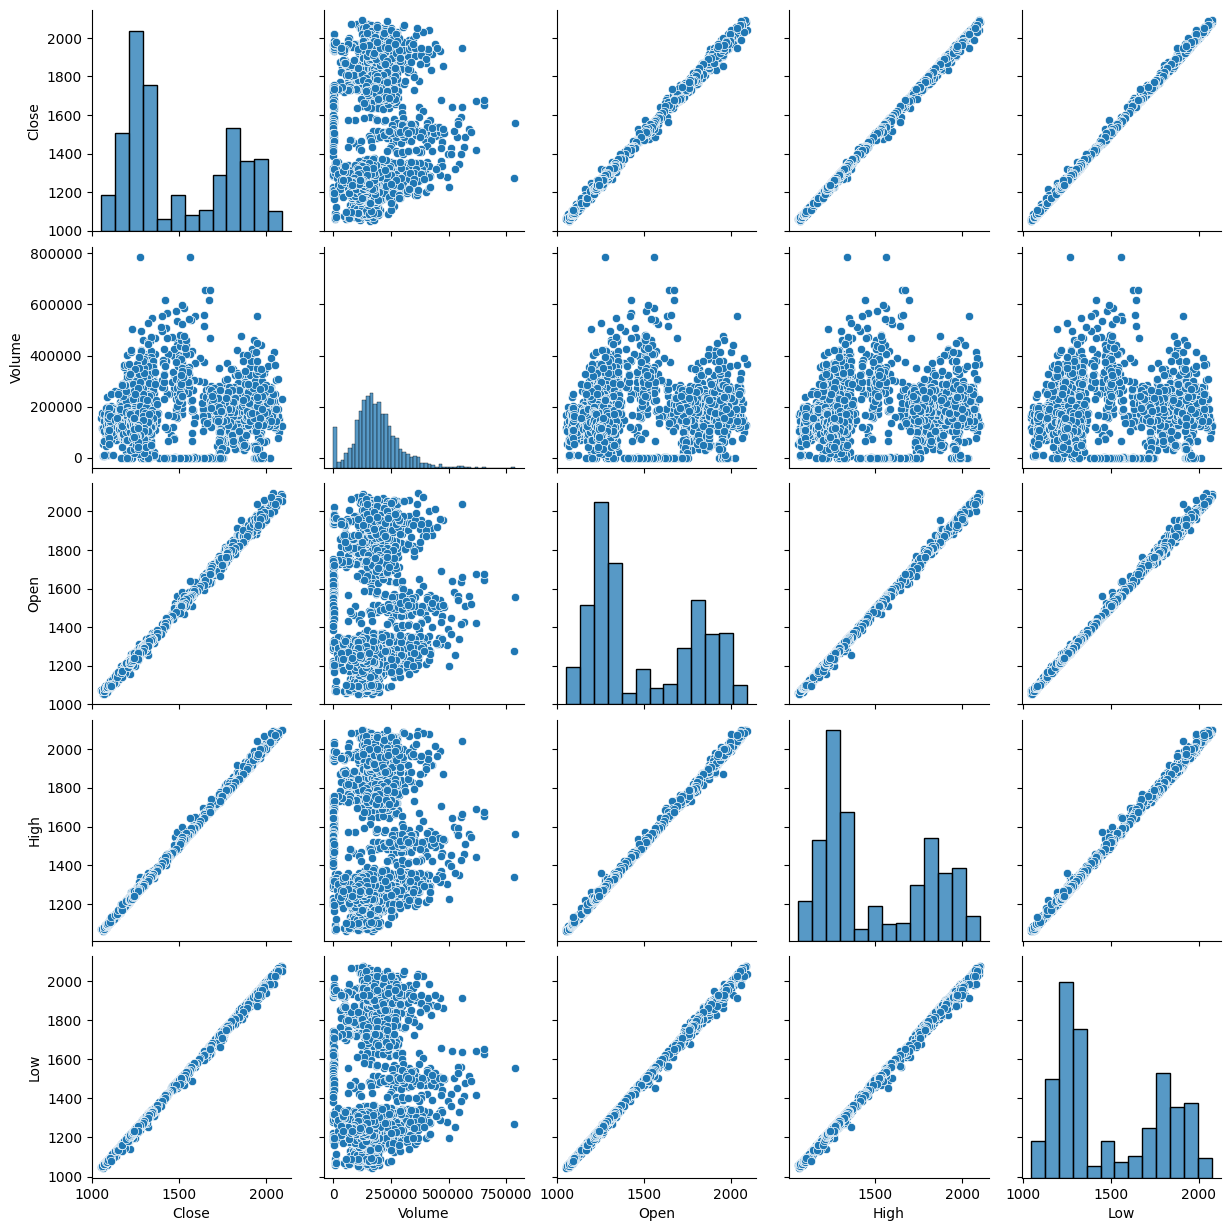

In [22]:
# Pairplot to see relationships between features
sns.pairplot(data[['Close', 'Volume', 'Open', 'High', 'Low']])
plt.show()

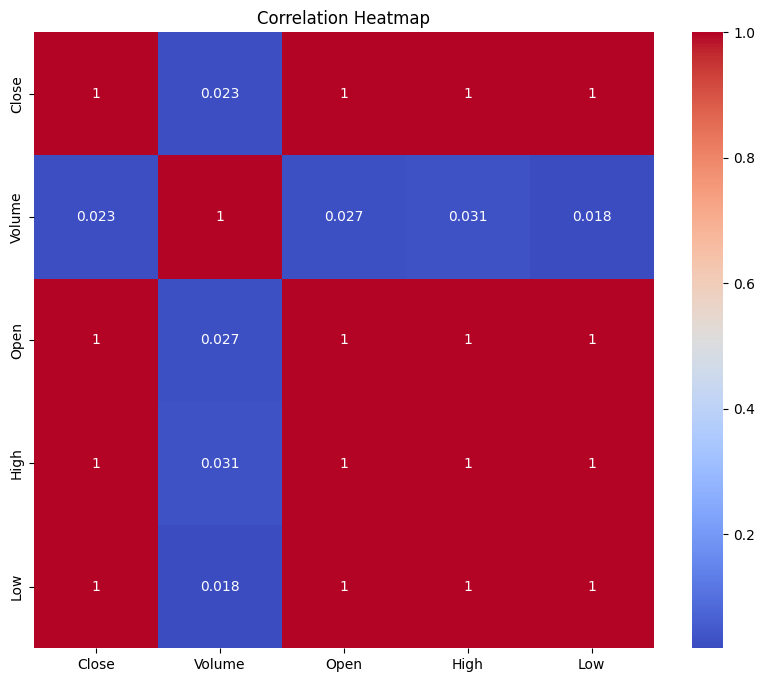

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[['Close', 'Volume', 'Open', 'High', 'Low']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Data Preprocessing

In [25]:
# the range of the trading day
data['Range'] = data['High'] - data['Low']

In [26]:
# Define features and target variable
X = data[['Open', 'High', 'Low', 'Volume', 'Range']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4.161666037423221
Mean Squared Error: 32.577897664497094
Root Mean Squared Error: 5.7077051136597
R-squared: 0.9996331952535923


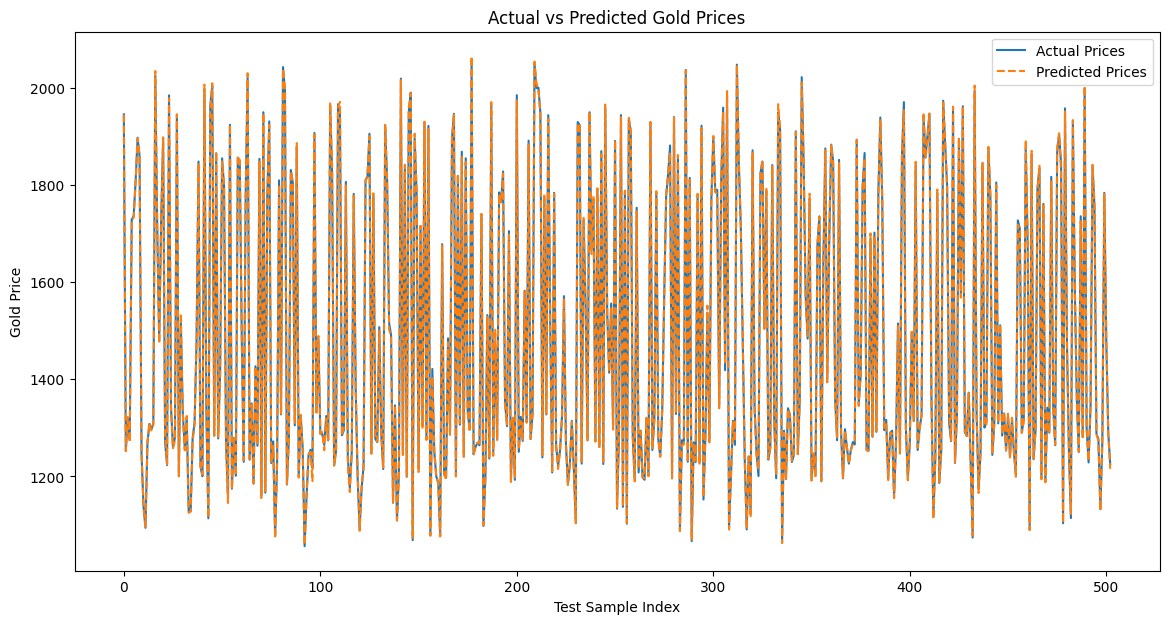

In [31]:
# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='--')
plt.title('Actual vs Predicted Gold Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

#Time Series Analysis

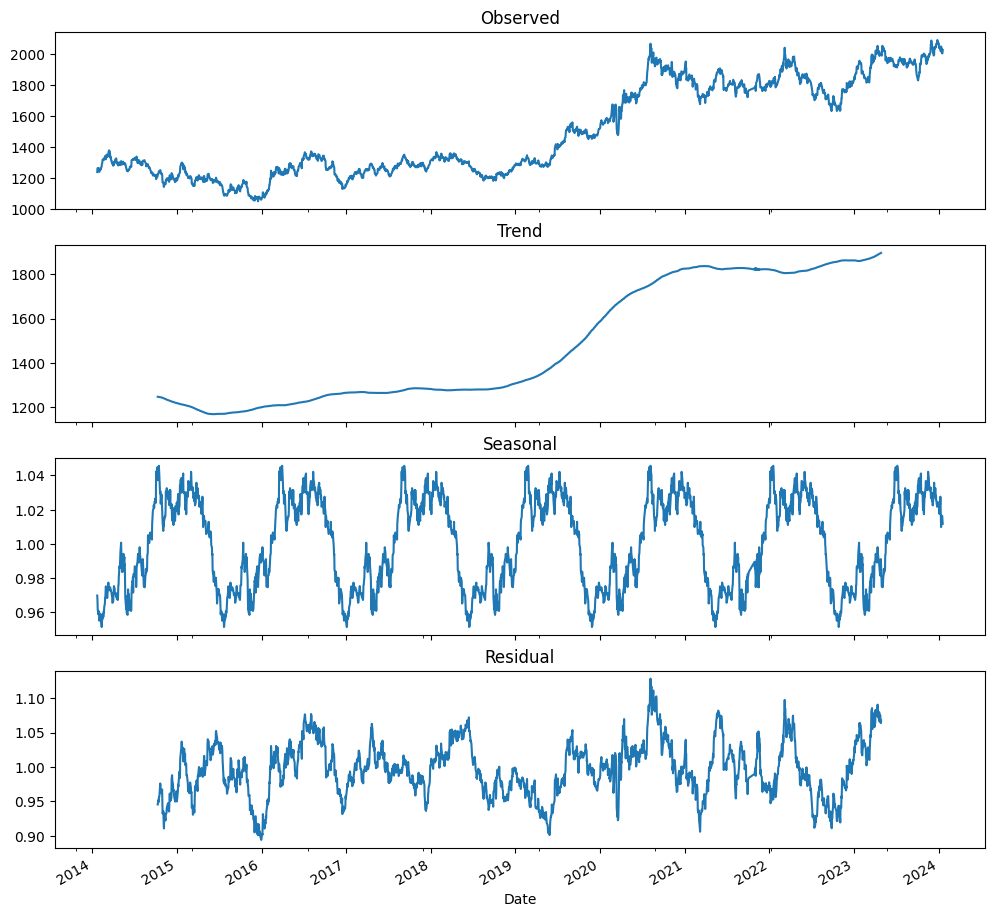

In [40]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the closing price time series
result = seasonal_decompose(data['Close'], model='multiplicative', period=365)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
result.observed.plot(ax=ax1, title='Observed')
result.trend.plot(ax=ax2, title='Trend')
result.seasonal.plot(ax=ax3, title='Seasonal')
result.resid.plot(ax=ax4, title='Residual')
plt.show()

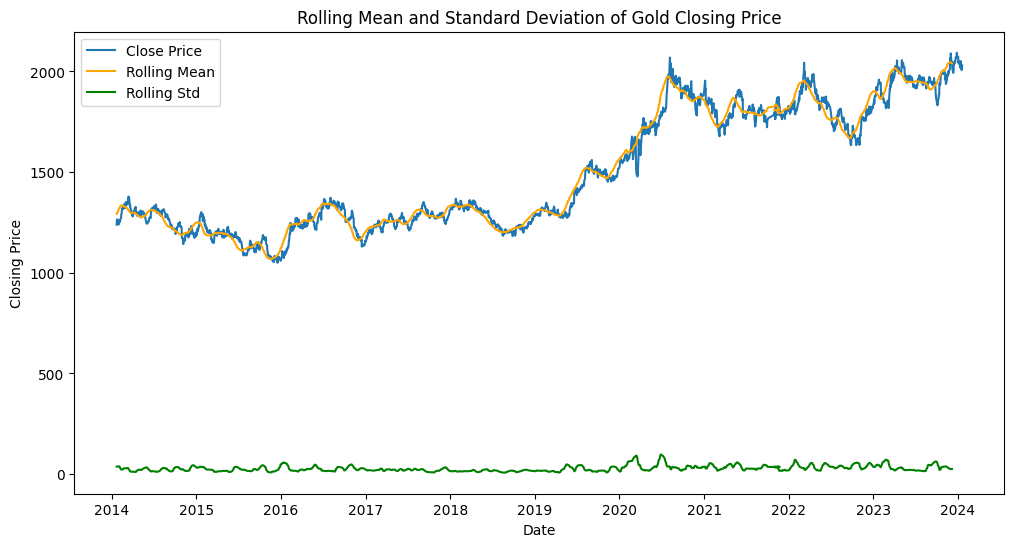

In [42]:
# Rolling Mean and Standard Deviation
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean and Standard Deviation of Gold Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#Advanced Modeling

In [54]:
# Split the dataset into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [55]:
# Function to evaluate model performance
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = math.sqrt(mean_squared_error(true, predicted))
    return mae, rmse

In [56]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import math

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model - MAE: 104.930939044245, RMSE: 123.22244882156853


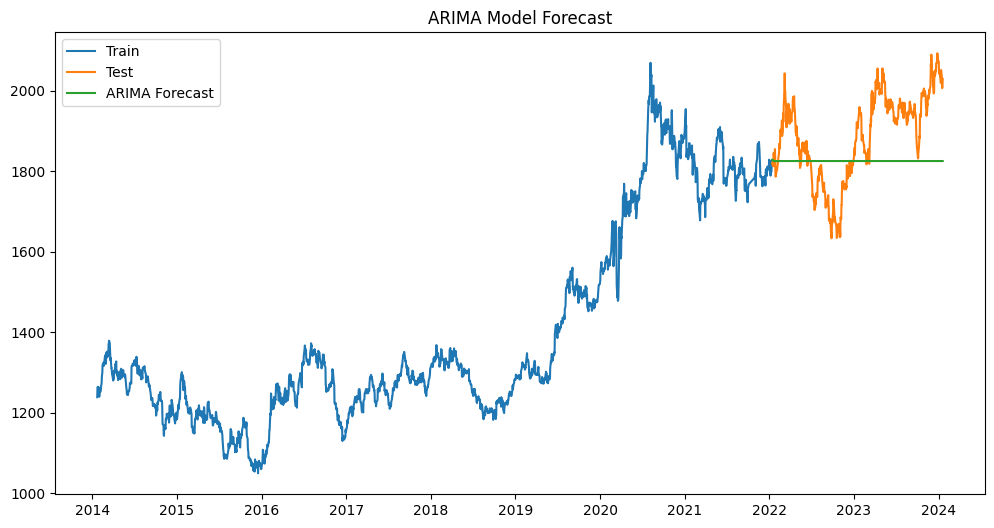

In [57]:
# 1. ARIMA Model
arima_model = ARIMA(train['Close'], order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))
arima_mae, arima_rmse = evaluate_model(test['Close'], arima_forecast)
print(f'ARIMA Model - MAE: {arima_mae}, RMSE: {arima_rmse}')

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.title('ARIMA Model Forecast')
plt.show()

#Trading Strategy Development

In [58]:
# Simple Moving Average (SMA) Crossover Strategy
data['SMA30'] = data['Close'].rolling(window=30).mean()
data['SMA100'] = data['Close'].rolling(window=100).mean()

# Buy Signal
data['Buy_Signal'] = np.where(data['SMA30'] > data['SMA100'], 1, 0)

# Sell Signal
data['Sell_Signal'] = np.where(data['SMA30'] < data['SMA100'], -1, 0)

# Buy and Sell signals combined
data['Signal'] = data['Buy_Signal'] + data['Sell_Signal']

# Backtest Strategy
data['Position'] = data['Signal'].shift()
data['Daily_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Daily_Return'] * data['Position']

# Cumulative Returns
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

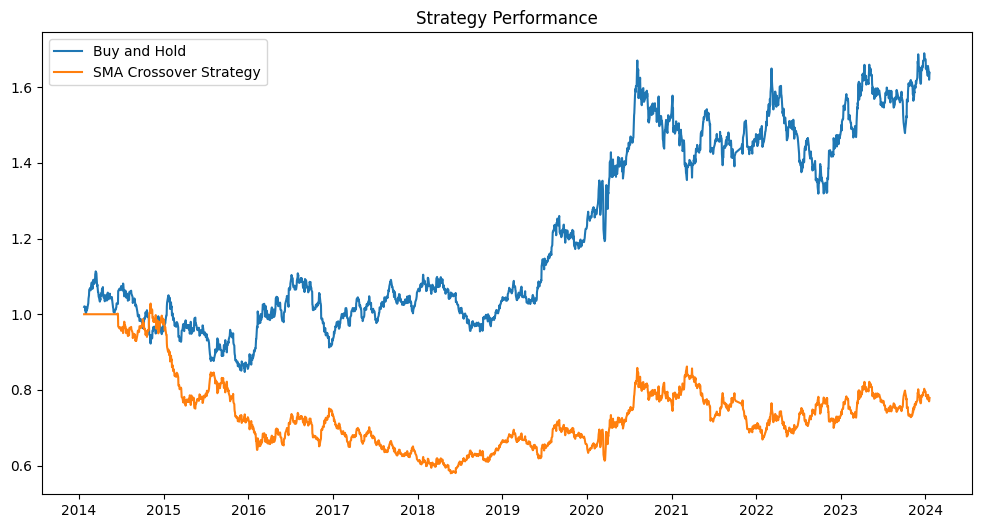

In [59]:
# Strategy Performance Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return'], label='Buy and Hold')
plt.plot(data['Cumulative_Strategy_Return'], label='SMA Crossover Strategy')
plt.legend()
plt.title('Strategy Performance')
plt.show()

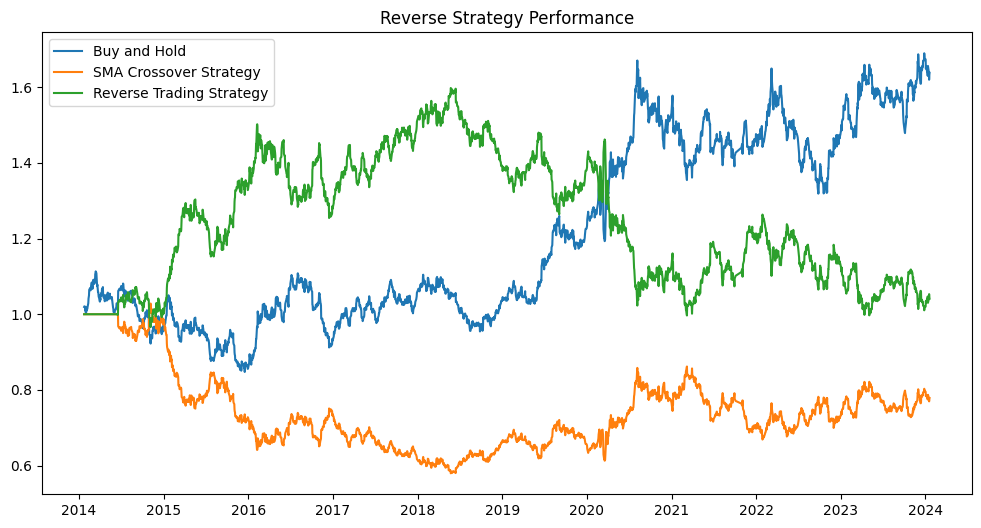

In [61]:
# Reverse Trading Strategy
data['Reverse_Signal'] = -data['Signal']
data['Reverse_Position'] = data['Reverse_Signal'].shift()
data['Reverse_Strategy_Return'] = data['Daily_Return'] * data['Reverse_Position']
data['Cumulative_Reverse_Strategy_Return'] = (1 + data['Reverse_Strategy_Return']).cumprod()

# Reverse Strategy Performance Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return'], label='Buy and Hold')
plt.plot(data['Cumulative_Strategy_Return'], label='SMA Crossover Strategy')
plt.plot(data['Cumulative_Reverse_Strategy_Return'], label='Reverse Trading Strategy')
plt.legend()
plt.title('Reverse Strategy Performance')
plt.show()

#Statistical Analysis

In [74]:
# Correlation analysis
correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Descriptive statistics
print("Descriptive Statistics:\n", data.describe())

# Augmented Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Correlation Matrix:
                                     Unnamed: 0     Close    Volume      Open  \
Unnamed: 0                            1.000000 -0.889680 -0.140905 -0.889586   
Close                                -0.889680  1.000000  0.036092  0.998994   
Volume                               -0.140905  0.036092  1.000000  0.038940   
Open                                 -0.889586  0.998994  0.038940  1.000000   
High                                 -0.888441  0.999524  0.042508  0.999459   
Low                                  -0.891092  0.999576  0.031774  0.999386   
SMA_50                               -0.897336  0.985626  0.002705  0.986248   
SMA_200                              -0.919939  0.951838 -0.081652  0.952204   
Signal                               -0.093405  0.149320  0.143842  0.150090   
Position                             -0.092833  0.148507  0.140922  0.149342   
SMA30                                -0.894061  0.990832  0.015997  0.991516   
SMA100             